### HUSK AT KIGGE HER: https://github.com/suneman/socialgraphs2025/wiki/Assignments

Denne fortæller at vi skal repeat the questions, når iv svarer på dem.

Ikke lav notebooken for lang.

Læs spørgsmålene forsigtig, og svar på alle sub-spørgsmål.

Split svarene op i forskellige kode sektioner.

Hold koden kort og god. Ikke nogle lange outputs derbare er der.

Alle plots skal vises flot. (Labels osv)

Alle figuere skal forklares.

Der skal refereres. 

Vær præcis og undgå at bruge objektivt sprog som "I think og", "In my opinion"

In [14]:
#Imports
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import requests
import pickle

## Assignment 1.1 - Exploring WS And BA Models

#### What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

The problem using random networks, to model real-world networks stems from the lack of outliers within the generated dataset. The book mentions people like President Rosevelt that had 22.000 acquaintances or Facebook users with the max amount of 5000 friends.

All data points wihtin the random network lie in the ranger of ⟨k⟩ &plusmn; $\sigma_k$ which as per the reasoning above would miss crucial data points that reflect the real world.

#### List the four regimes that characterize random networks as a function of ⟨k⟩.

The four regimes are: 

* Subcritical - 0 < ⟨k⟩ < 1 
* Critical  - ⟨k⟩ = 1
* Supercritical - ⟨k⟩ > 1
* Connected - ⟨k⟩ = ln(N)


#### According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?

This is because the random network predictions, predict that the clustering coefficient is non-dependent on the amount of degrees a node has but rather the average degree across the whole network. That means that the random network does not take grouping into account where the coefficient is much higher.


### Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity  p=0, 0.1, and  1.

In [5]:
# Generation of WS graphs.

AVG_DEG = 4
N = 500

p0 = nx.watts_strogatz_graph(N, AVG_DEG, 0)
p01 = nx.watts_strogatz_graph(N, AVG_DEG, 0.1)
p1 = nx.watts_strogatz_graph(N, AVG_DEG, 1)

#### Calculate the average shortest path length ⟨d⟩ for each one.

As WS graphs start as ring lattices, connected to k-nearest neighbors, and "shortcuts" has p chance to replace existing edges. We can derive the following:

As p0 has p = 0, this means there are no "shortcuts", meaning the furthest away node is the the node completely opposite of the starting node. Also, as ⟨k⟩ is even the longest step is ⟨k⟩/2 nodes. The average distance to any node in a ring lattice, is (N/2 + 1)/2. Thus we can derive ⟨d⟩ = ((N/2 + 1)/2)/(⟨k⟩/2).

As nx.watts_strogatz_graph returns a small world graph for intermediate p-values meaning 0 < p <= 1, we can find the formula average shortest path from the book in Section 3.8 formula 3.19. 

This formula is presented as: ⟨d⟩ = ln(N)/ln(⟨k⟩)

As the only difference between the last 2 graphs are the rewiring probability, p. We can calculate the approx. shortest path as a random graph.

In [6]:
d0 = ((N/2 + 1)/2)/(AVG_DEG/2)
print(f'The average shortest path for p=0: {d0}')

d = np.log(N)/np.log(AVG_DEG)
print(f'The average shortest path for p=1 and p=0.1: {round(d,2)}')

The average shortest path for p=0: 62.75
The average shortest path for p=1 and p=0.1: 4.48


#### Describe what happens to the network when p=1

When a WS graph has a rewiring possiblity of 1, all edges are replaces with "shortcuts" making in that way much like the ER graph. Yet, in the WS graph, each node still has exactly ⟨k⟩ edges, while the ER graph degree distribution is centered around ⟨k⟩.

#### What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.

In [7]:
# Generation of 200 of WS graphs with different p values and calculating their average shortest path length
# Generating a single ER graph for baseline comparison
seed = 1

#Generate an array of values with different p values
p_values = np.linspace(1*10**-5, 1, 200)
avg_shortest_paths = []
for p in p_values:
    G = nx.watts_strogatz_graph(N, AVG_DEG, p, seed=seed)
    avg_shortest_path = nx.average_shortest_path_length(G)
    avg_shortest_paths.append({p: avg_shortest_path})


# one ER baseline
prob = AVG_DEG / (N - 1)
G_er = nx.erdos_renyi_graph(N, prob, seed=seed)
if not nx.is_connected(G_er):
    GCC = max(nx.connected_components(G_er), key=len)
    G_er = G_er.subgraph(GCC).copy()
L_er = nx.average_shortest_path_length(G_er)


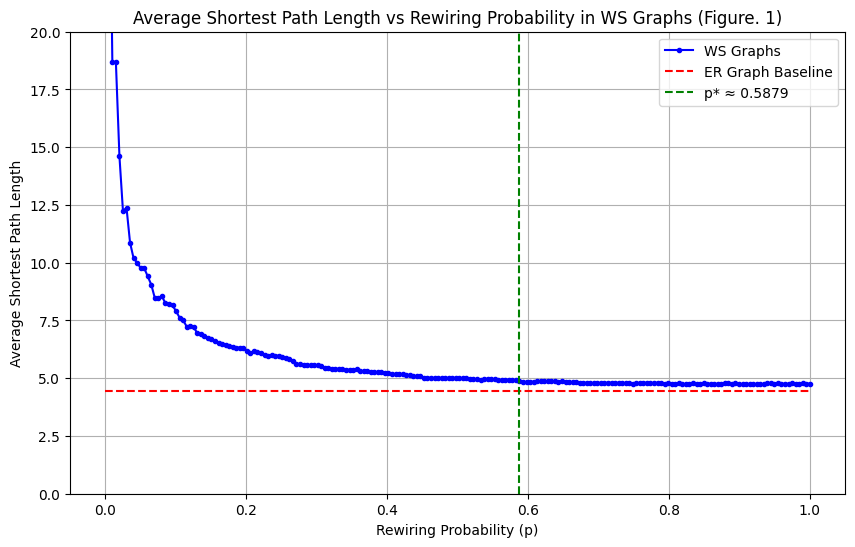

In [8]:
#Plot the results
delta = 0.1  # 10% tolerance; change as you like
L_ws = [list(d.values())[0] for d in avg_shortest_paths]

# 1) Find first p where WS is within (1+delta) of the baseline
target = (1 + delta) * L_er
idx = np.where(np.array(L_ws) <= target)[0]
p_star = p_values[idx[0]] if len(idx) else None

plt.figure(1, figsize=(10, 6))
plt.plot(p_values, L_ws, marker='o', markersize=3, color='blue', label='WS Graphs')
plt.hlines(L_er, color='red', xmin=0, xmax=max(p_values), linestyle='--', label='ER Graph Baseline')
plt.vlines(p_star, color='green', ymin=0, ymax=20, linestyle='--', label=f'p* ≈ {p_star:.4f}' if p_star else 'No p* found')
plt.ylim(0, 20)
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length')
plt.title('Average Shortest Path Length vs Rewiring Probability in WS Graphs (Figure. 1)')
plt.grid(True)

plt.legend()
plt.show()

The value at which p is accepted has been chosen to be within 10% of the fully random networks average shortest path.

We have generated WS graphs for 200 different p values. As seen in figure 1, as p approaches 1 the corresponding average shortest path converges on the ER baseline. 

As mentioned accepted vakues has to be within 10% of the baseline, this happens when p reaches 0.5879 for this particular seed.

#### Generate 50 networks with  N=500,  ⟨k⟩=4, for each of  p={0,0.01,0.03,0.05,0.1,0.2}. Calculate the average of  ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.

In [24]:
p_values = [0, 0.001, 0.03, 0.05, 0.1, 0.2]
repeats = 50
avg_paths = []

means = []
stds = []

for p in p_values:
    curr_paths = []
    for r in range(repeats):
        G = nx.watts_strogatz_graph(N, AVG_DEG, p)
        avg_path = nx.average_shortest_path_length(G)
        curr_paths.append({p: avg_path})
    avg_paths.append(curr_paths)
    means.append(np.array([list(d.values())[0] for d in curr_paths]).mean())
    stds.append(np.array([list(d.values())[0] for d in curr_paths]).std())


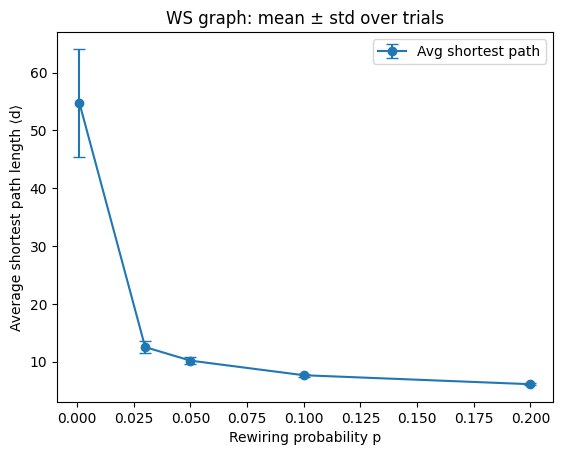

In [23]:
#Plot the results

plt.errorbar(p_values, means, yerr=stds, fmt='o-', capsize=4, label="Avg shortest path")
plt.xlabel("Rewiring probability p")
plt.ylabel("Average shortest path length ⟨d⟩")
plt.title("WS graph: mean ± std over trials")
plt.legend()
plt.show()

## Assignment 1.2


#### Explain your process

The first step was cleaning the list of Rock Musicians. Even though we had read up a bit on regex we decided to use a LLM to create the neccessary expression, '\[\[([^\[\]|]+?)(?:\|[^\[\]]+)?\]\]', which was tested on https://regex101.com/. The regex only extracted the page name. We manually loaded the wikitext in a .txt file. and then used the "re" library to find the text matching the regex. After that all matches were iterated over in a for loop removing the redundant name if the artist link contained both a display name and the link keeping the link. We also checked for duplicates in case any artist got copied twice. A manual check of the list revealed that the music label "AllMusic had been retrieved aswell, and was then deleted.


Hereafter we needed to download the wikitext for each artist. The first step is retrieving the list of artists, the a directory is created to put all the .txt files in. Iterating over the list of artists, each artist name is reformatted to match the expected URL format, and then an API request is sent to wikipedia for each artists. A list kept track of which requests failed, resulting in a list of 5 artists, this was saved in a meta data Json. This was due to special characters in their name which didn't fit the url format. The easiest fix was to simply make a list of the 5 artists with the correct formatting and then downloading the remaining texts.

Now we could traverse the network and build the files. Here the approach was to iterate over each file in the wiki text directory and then add a node, and outgoing edges corresponding to links matching our list of artists. Before this happens though, the wiki text is counted. Using regex HTML tags, links, headers and table markup is removed. Then the cleaned text is saved in a new variable to preserve the original. Then the length of the file is found and that is used as basis for the word count. The first issue became apparent when way too many nodes were being added. This was due to nodes being duplicated by first being added as the endpoint for an outgoing edge, and then being added again when iteration came their own wiki file. The solution was to introduce a check, before adding a node, that it was not already added.

Using the same Regular Expression, as when creating the artist link, all links are identified and saved in a list. Then the link list is iterated checking whether the link is the same as the name of the artists whose wiki text is currently being checked, in which case the link is discarded. If the link is not the same artist, then we check whether it exists in the list of artists in our network. If that is the case the edge is added to the network. If the link is not already added to the network, it is first added as a node with a word count of 0. The word count is then updated when the iteration comes to the respective wiki file. 

After the script had run we checked the number of nodes and edges, and compared it with other groups. Here we could conclude similar results. We also checked the names of the first and last 10 nodes to check whether the matched bands in our list. 

#### Challenges
Even though we both have experience making API request we had some minor issues getting the headers and params correct. Here the wikipedia API documentation was helpful. We also encountered the issue of invalid characters for request url. A more graceful solution could have probably been found, but just manually editing the urls was decided to be the easiest. It was probably the most frustrating part having waited for the wikitexts to download only realise all the requests had failed. The biggest challenge however was dealing with the regex, and using it to remove all the unneccessary parts. In the initial setup of the network traversal, items were included as nodes since the regex didn't match properly. 

#### Use of LLM and what could have been done differently
Using the LLM for the regex, was a bit of a challenge and much testing was needed to check the work. Furthermore, LLM's were used to help with the debugging. At times it was also used to explain the way certain functions worked, like adding an attribute to a node in the network. 

If we started over we would have probably compartmentalised a bit more creating functions for different purposes, making the code easier to debug and maintain an overview. 


#### Simple network statistics and analysis





In [ ]:
# Retrieving the rock network without 0 degree nodes from GitHub

url = 'https://raw.githubusercontent.com/LucasJuel/socialgraphs2025/main/assignments/answers/rock_artists_network.pkl'
response = requests.get(url)

G = pickle.loads(response.content)

# --- IGNORE ---
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')
#print(f'Average shortest path length: {nx.average_shortest_path_length(G)}')

Number of nodes: 488
Number of edges: 7197
